In [40]:
#Question1: How many records are present in the dataset? Print the metadata information of the dataset.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
mydata=pd.read_csv("bollywood.csv")
print("Number of records :", len(mydata))
print(mydata.info())

Number of records : 149
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None


In [41]:
#Question2: How many movies got released in each genre? Which genre had highest number of releases?
#Sort number of releases in each genre in descending order.

df2 = mydata.groupby(['Genre'])['Genre'].count()
print(df2)

df2_desc = df2.sort_values(ascending=False)
print(df2_desc)

print(df2_desc.head(1))

Genre
Action      24
Comedy      36
Drama       35
Romance     25
Thriller    29
Name: Genre, dtype: int64
Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64
Genre
Comedy    36
Name: Genre, dtype: int64


In [42]:
#Question3: How many movies in each genre got released in different release times?
# Table1=pd.pivot_table(mydata,values=["ReleaseTime"],index=["Genre"])
# print(Table1)

ct = pd.crosstab(mydata['Genre'], mydata['ReleaseTime'])
print(ct)

ReleaseTime  FS  HS  LW   N
Genre                      
Action        3   3   3  15
Comedy        3   5   5  23
Drama         4   6   1  24
Romance       3   3   4  15
Thriller      4   1   2  22


In [43]:
#Question4: Which month of the year maximum number of movie releases are seen?

mydata['month'] = pd.DatetimeIndex(mydata['Release Date']).month
count = mydata.groupby(['month'])['month'].count().head(1)
print(count)

month
1    20
Name: month, dtype: int64


In [44]:
#Question5: Which month of the year typically sees the most releases of high budgeted movies, that is, movies with budget of 
#25 crore or more?
filtered_budget = mydata[mydata['Budget'] > 25]
count_budget = filtered_budget.groupby('month').count()['Budget']
print(count_budget.sort_values(ascending=False).head(1))

month
2    9
Name: Budget, dtype: int64


In [45]:
#Question6: Which are the top 10 movies with the maximum ROI?
mydata['ROI'] = ((mydata['BoxOfficeCollection'] - mydata['Budget'])/mydata['Budget']).round(2)
desc_ROI = mydata.sort_values(by='ROI', ascending=False)
print(desc_ROI[["MovieName", "ROI"]].head(10))

                     MovieName   ROI
64                  Aashiqui 2  8.17
89                          PK  7.65
132                Grand Masti  7.51
135               The Lunchbox  7.50
87                      Fukrey  6.24
58                    Mary Kom  5.93
128                     Shahid  5.67
37   Humpty Sharma Ki Dulhania  5.50
101         Bhaag Milkha Bhaag  4.47
115            Chennai Express  4.27


In [46]:
#Question7: Do the movies have higher ROI if they get released on festive seasons or long weekend?
#Calculate the average ROI for different Release Times?
table2=pd.pivot_table(mydata,values=["ROI"],index=["ReleaseTime"])
avgROIs = table2.round(2)
print(avgROIs)

print("If we compare ROIs of movies released on Long weekend and Festive season, Long weekend movies have higher ROI of 1.13 than",
      "compared to that of Festive season, i.e., 0.98") 

              ROI
ReleaseTime      
FS           0.98
HS           0.85
LW           1.13
N            0.66
If we compare ROIs of movies released on Long weekend and Festive season, Long weekend movies have higher ROI of 1.13 than compared to that of Festive season, i.e., 0.98


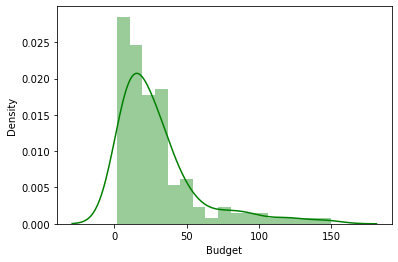

From the plot, we can see that most of the movies' budget is between 0-40. The distribution is Right-Skewed,  with median less than mean. Hence we can conculde most of the movies are low-budgeted.


In [13]:
#Question8: Draw histogram and the distribution plot to find out the distribution of movie budgets? Interpret the plot to
#conclude if the most movies are high or low budgeted.
import seaborn as sn
import matplotlib.pyplot as plt
sn.distplot(mydata.Budget,color="g")
plt.show()

print("From the plot, we can see that most of the movies' budget is between 0-40. The distribution is Right-Skewed, ", 
      "with median less than mean. Hence we can conculde most of the movies are low-budgeted.")

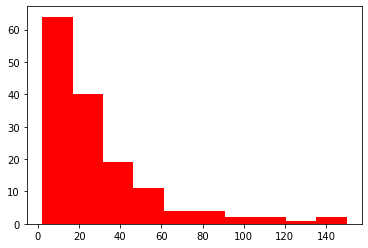

In [47]:
plt.hist(mydata.Budget, color="r")
plt.show()

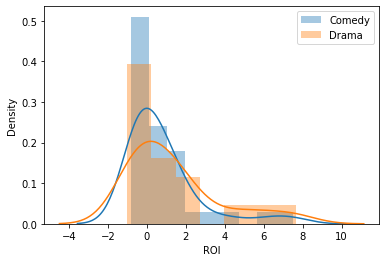

In [49]:
#Question9: Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROI?

sn.distplot(mydata.ROI[mydata.Genre == 'Comedy'], label='Comedy')
sn.distplot(mydata.ROI[mydata.Genre == 'Drama'], label='Drama')
plt.legend()

In [50]:
#Question10: Is there a correlation between Box office collection and YouTube likes? Is the correlation positive or negative?

from scipy.stats import pearsonr
corr, _ = pearsonr(mydata.BoxOfficeCollection, mydata.YoutubeLikes)
print('Pearsons correlation: %.3f' % corr)

if corr > 0:
    print("Correlation between BoxOffice Colelctions and YouTube Likes is positive")
else:
    print("Correlation between BoxOffice Colelctions and YouTube Likes is negative")

Pearsons correlation: 0.683
Correlation between BoxOffice Colelctions and YouTube Likes is positive


<AxesSubplot:>

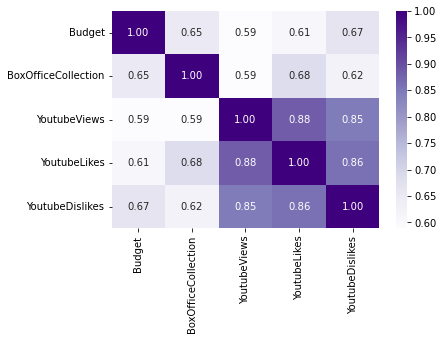

In [51]:
#Question12: Which of the variables among budget, Boxoffice Collection, YouTube Views, YouTube likes, YouTube dislikes 
#are highly correlated?

sn.heatmap(mydata.iloc[:,5:10].corr(), annot=True,cmap="Purples",fmt="0.2f" )

Genre
Action    401873
Name: YoutubeLikes, dtype: int64


<AxesSubplot:xlabel='YoutubeLikes', ylabel='Genre'>

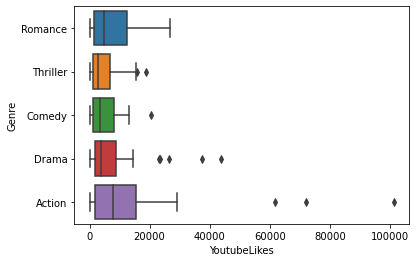

In [52]:
#Question11: Which genre of movies typically see more YouTube likes? Draw boxplots for each genre of movies to compare.
genre_data = mydata.groupby("Genre")['YoutubeLikes'].sum()
print(genre_data.sort_values(ascending=False).head(1))

sn.boxplot(y=mydata.Genre, x=mydata.YoutubeLikes)